In [1]:
import numpy as np # linear algebra
import pandas as pd

import seaborn as sns
# Load the exercise dataset
exercise_data = pd.read_csv('/home/eneter/vscode/3frontesh/exercise.csv')

print(exercise_data)


print(exercise_data.columns) # titanic data set

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


        ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  \
0        1   Exercise 2     286.959851     91.892531      96.301115   45   
1        2   Exercise 7     343.453036     64.165097      61.104668   25   
2        3   Exercise 4     261.223465     70.846224      71.766724   20   
3        4   Exercise 5     127.183858     79.477008      82.984456   33   
4        5  Exercise 10     416.318374     89.960226      85.643174   29   
...    ...          ...            ...           ...            ...  ...   
3859  3860   Exercise 5     154.113144     98.147291      96.745133   20   
3860  3861   Exercise 4     486.392768     97.598957      92.700573   21   
3861  3862   Exercise 4     264.307731     94.946612      96.778936   57   
3862  3863   Exercise 9     185.951870     64.743906      68.662889   58   
3863  3864   Exercise 7     116.360417     56.757424      59.833403   35   

      Gender  Duration  Heart Rate        BMI Weather Conditions  \
0       Male       

In [2]:
import pandas as pd
# Preprocess the data
from sklearn.preprocessing import OneHotEncoder

ex = exercise_data
ex.drop(['ID'], axis=1, inplace=True)
ex.dropna(inplace=True) # drop rows with at least one missing value, after dropping unuseful columns

ex['Gender'] = ex['Gender'].apply(lambda x: 1 if x == 'male' else 0)
# Encode categorical variables
exercise = OneHotEncoder(handle_unknown='ignore')
exercise.fit(ex[['Exercise']])
e_hot = exercise.transform(ex[['Exercise']]).toarray()
cols = ['Exercise_' + val for val in exercise.categories_[0]]
ex[cols] = pd.DataFrame(e_hot)
ex.drop(['Exercise'], axis=1, inplace=True)
ex.dropna(inplace=True) # drop rows with at least one missing value, after preparing the data

Weather_Conditions = OneHotEncoder(handle_unknown='ignore')
Weather_Conditions.fit(ex[['Weather Conditions']])
w_hot = Weather_Conditions.transform(ex[['Weather Conditions']]).toarray()
cols = ['Weather Conditions_' + val for val in Weather_Conditions.categories_[0]]
ex[cols] = pd.DataFrame(w_hot)
ex.drop(['Weather Conditions'], axis=1, inplace=True)
ex.dropna(inplace=True)


print(ex.columns)
display(ex)

Index(['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Gender',
       'Duration', 'Heart Rate', 'BMI', 'Exercise Intensity',
       'Exercise_Exercise 1', 'Exercise_Exercise 10', 'Exercise_Exercise 2',
       'Exercise_Exercise 3', 'Exercise_Exercise 4', 'Exercise_Exercise 5',
       'Exercise_Exercise 6', 'Exercise_Exercise 7', 'Exercise_Exercise 8',
       'Exercise_Exercise 9', 'Weather Conditions_Cloudy',
       'Weather Conditions_Rainy', 'Weather Conditions_Sunny'],
      dtype='object')


,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Exercise Intensity,Exercise_Exercise 1,...,Exercise_Exercise 3,Exercise_Exercise 4,Exercise_Exercise 5,Exercise_Exercise 6,Exercise_Exercise 7,Exercise_Exercise 8,Exercise_Exercise 9,Weather Conditions_Cloudy,Weather Conditions_Rainy,Weather Conditions_Sunny
0,286.959851,91.892531,96.301115,45,0,37,170,29.426275,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,343.453036,64.165097,61.104668,25,0,43,142,21.286346,5,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,261.223465,70.846224,71.766724,20,0,20,148,27.899592,4,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,127.183858,79.477008,82.984456,33,0,39,170,33.729552,10,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,416.318374,89.960226,85.643174,29,0,34,118,23.286113,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,154.113144,98.147291,96.745133,20,0,22,139,32.447764,7,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3860,486.392768,97.598957,92.700573,21,0,49,160,26.602475,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3861,264.307731,94.946612,96.778936,57,0,56,167,31.435348,9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3862,185.951870,64.743906,68.662889,58,0,60,128,19.774614,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


@
- given time
- given diet
- given kind

predict the pulse 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Build distinct data frames on survived column
X = ex.drop('Actual Weight', axis=1) # all except 'survived'
y = ex['Actual Weight'] # only 'survived'

# Split arrays in random train 70%, random test 30%, using stratified sampling (same proportion of survived in both sets) and a fixed random state (42
# The number 42 is often used in examples and tutorials because of its cultural significance in fields like science fiction (it's the "Answer to the Ultimate Question of Life, The Universe, and Everything" in The Hitchhiker's Guide to the Galaxy by Douglas Adams). But in practice, the actual value doesn't matter; what's important is that it's set to a consistent value.
# X_train is the DataFrame containing the features for the training set.
# X_test is the DataFrame containing the features for the test set.
# y-train is the 'survived' status for each passenger in the training set, corresponding to the X_train data.
# y_test is the 'survived' status for each passenger in the test set, corresponding to the X_test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Test the model
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier Accuracy: {:.2%}'.format(accuracy))  

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Test the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('LogisticRegression Accuracy: {:.2%}'.format(accuracy))  

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
x1 = ex.drop('Actual Weight',axis=1)
y1 = ex['Actual Weight']
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=11)
reg = LinearRegression()
model = reg.fit(x_train,y_train)
y_score = model.score(x_test,y_test)
y_score

0.9639869245844936

In [8]:
model.intercept_ 

0.6521199346693578

In [9]:
model.coef_

array([-7.61281187e-05,  1.00115950e+00, -5.06171825e-03,  1.11022302e-16,
        2.84799017e-03,  4.48193095e-04, -2.23404297e-02, -1.22325897e-02,
        2.25982416e-01, -1.81029878e-01,  3.30094479e-02, -7.27729116e-02,
       -6.60123672e-02,  1.03696090e-02,  2.50685971e-01,  1.74721984e-01,
       -9.72907057e-02, -2.77663565e-01,  3.00394006e-04, -5.38319397e-02,
        5.35315457e-02])

In [10]:
y_pred = model.predict(x_test)

In [13]:
import numpy as np
import statsmodels.api as sm
# from statsmodels import OLS 
lm = sm.OLS(y_train, x_train)
sts = lm.fit()
sts.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Actual Weight   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     4450.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:25:18   Log-Likelihood:                -7628.7
No. Observations:                3091   AIC:                         1.530e+04
Df Residuals:                    3072   BIC:                         1.541e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Calories Burn             -7.613e-05      0.000     -0.171      0.864      -0.001       0.001
Dream Weight                  1.0012      0.004    282.482      0.000       0.994       1.008
Age                          -0.0051      0.004     -1.226      0.220      -0.013       0.003
Gender                    -5.339e-17   2.59e-16     -0.206      0.837   -5.62e-16    4.55e-16
Duration                      0.0028      0.004      0.651      0.515      -0.006       0.011
Heart Rate                    0.0004      0.002      0.203      0.839      -0.004       0.005
BMI                          -0.0223      0.011     -2.060      0.040      -0.044      -0.001
Exercise Intensity           -0.0122      0.018     -0.672      0.502      -0.048       0.023
Exercise_Exercise 1           0.3765      0.199      1.894      0.058      -0.013       0.766
Exercise_Exercise 10         -0.0305      0.198     -0.154      0.877      -0.419       0.358
Exercise_Exercise 2           0.1835      0.209      0.877      0.380      -0.227       0.594
Exercise_Exercise 3           0.0777      0.207      0.376      0.707      -0.328       0.484
Exercise_Exercise 4           0.0845      0.208      0.406      0.685      -0.324       0.493
Exercise_Exercise 5           0.1609      0.204      0.788      0.431      -0.239       0.561
Exercise_Exercise 6           0.4012      0.206      1.944      0.052      -0.003       0.806
Exercise_Exercise 7           0.3252      0.206      1.577      0.115      -0.079       0.729
Exercise_Exercise 8           0.0532      0.208      0.256      0.798      -0.355       0.461
Exercise_Exercise 9          -0.1272      0.202     -0.629      0.529      -0.523       0.269
Weather Conditions_Cloudy     0.5019      0.451      1.112      0.266      -0.383       1.387
Weather Conditions_Rainy      0.4478      0.453      0.988      0.323      -0.440       1.336
Weather Conditions_Sunny      0.5552      0.453      1.225      0.221      -0.334       1.444
==============================================================================
Omnibus:                     2238.465   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.557
Skew:                          -0.011   Prob(JB):                     6.20e-40
Kurtosis:                       1.816   Cond. No.                     3.52e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.27e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:xlabel='Actual Weight'>

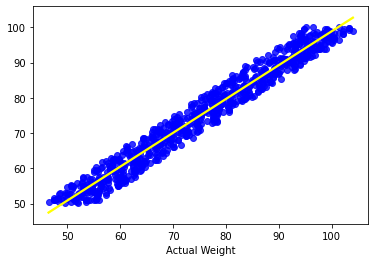

In [14]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={"color": "blue"}, line_kws={"color": "yellow"})